In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2

[]

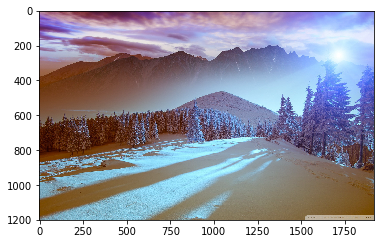

In [28]:
im = cv2.imread("C:/Users/Dell/Desktop/landscape (1).jpg")
(h,w,c) = im.shape
plt.imshow(im)
plt.plot()

In [29]:
im.shape  # 244 is height 372 is width and 3 channels ie RGB

(1200, 1920, 3)

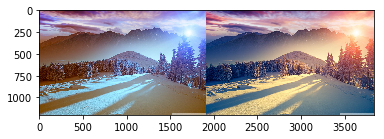

In [30]:
image = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(np.hstack([im,image]))
plt.show()

In [31]:
print(im.shape) 

(1200, 1920, 3)


In [18]:
# to flatten it - we get 90768 pixels and 3 channels 
# every bit takes value either 0 or 1 
# 3 channels are R = 1 byte = 8 bit = 2**8 combinations = 255
# B = 1 byte = 8 bit  = 2**8 combinations = 255
# G = 1 byte = 8 bit  = 2**8 combinations = 255
# by permutation and combination total combinations are 255x255x255 = 1,65,81,375 color combinations are there
# but in reality a human eye can see max 30 colors and also size of this image is too large
# and we have to reduce it by not loosing any information
# so we do clustering to compress image.

In [ ]:
image = image.reshape((image.shape[0]*image.shape[1] , 3))
from sklearn.cluster import MiniBatchKMeans
clt = MiniBatchKMeans(n_clusters = 16)
labels = clt.fit_predict(image)

In [ ]:
print(labels.shape)

In [35]:
print(labels[200:]) # means which pixel is in which cluster from 0 to 15

[ 7  7  7 ... 13 13 13]


In [38]:
print(clt.cluster_centers_.astype('uint8').shape)
quant = clt.cluster_centers_.astype('uint8')[labels]
print(quant.shape)


(16, 3)
(2304000, 3)


In [43]:
quant = quant.reshape((h,w,3))
image = image.reshape((h,w,3))

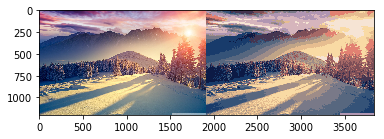

In [44]:
plt.imshow(np.hstack([image,quant]))
plt.show()

In [ ]:
quant = cv2.cvtColor(quant,cv2.COLOR_RGB2BGR)
cv2.imwrite('Compressed1.jpg',quant)